In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Hopfield Network Implementation
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size  # Number of nodes
        self.weights = np.zeros((size, size))  # Weight matrix

    def train(self, patterns):
        for pattern in patterns:
            pattern = np.reshape(pattern, (self.size, 1))  # Column vector
            self.weights += np.dot(pattern, pattern.T)  # Hebbian rule
        np.fill_diagonal(self.weights, 0)  # Zero out diagonal (no self-loops)

    def recall(self, pattern, steps=10):
        state = np.copy(pattern)
        for _ in range(steps):
            for i in range(self.size):
                raw_input = np.dot(self.weights[i, :], state)
                state[i] = 1 if raw_input > 0 else -1  # Binary threshold
        return state


# Test with a 10x10 binary associative memory
patterns = [
    np.random.choice([-1, 1], size=10),  # Random binary patterns
    np.random.choice([-1, 1], size=10)
]

hopfield = HopfieldNetwork(size=10)
hopfield.train(patterns)

# Test recall with a noisy version of the first pattern
noisy_input = np.copy(patterns[0])
noisy_input[:3] *= -1  # Add noise to the first three bits
recalled_pattern = hopfield.recall(noisy_input)

print("Original pattern:", patterns[0])
print("Noisy input:", noisy_input)
print("Recalled pattern:", recalled_pattern)

Original pattern: [-1 -1  1  1  1 -1  1  1  1  1]
Noisy input: [ 1  1 -1  1  1 -1  1  1  1  1]
Recalled pattern: [-1 -1  1  1  1 -1  1  1  1  1]


In [ ]:
def calculate_capacity(network_size):
    return int(0.15 * network_size)

capacity = calculate_capacity(10)
print(f"Theoretical capacity for a 10-node Hopfield network: {capacity} patterns")

Theoretical capacity for a 10-node Hopfield network: 1 patterns


In [ ]:
def test_error_correction(hopfield, pattern, max_noise_bits):
    results = []
    for noise_bits in range(max_noise_bits + 1):
        noisy_pattern = np.copy(pattern)
        flip_indices = np.random.choice(range(len(pattern)), size=noise_bits, replace=False)
        noisy_pattern[flip_indices] *= -1  # Flip bits
        recalled = hopfield.recall(noisy_pattern)
        results.append((noise_bits, np.array_equal(recalled, pattern)))
    return results

error_correction_results = test_error_correction(hopfield, patterns[0], max_noise_bits=5)
print("Error correction results (Noise bits, Success):", error_correction_results)

Error correction results (Noise bits, Success): [(0, True), (1, True), (2, True), (3, True), (4, False), (5, True)]


In [ ]:
def eight_rook_energy(state):
    # Convert state into a matrix form (8x8)
    state_matrix = np.reshape(state, (8, 8))
    row_conflicts = np.sum(np.sum(state_matrix, axis=1) - 1)**2
    col_conflicts = np.sum(np.sum(state_matrix, axis=0) - 1)**2
    return row_conflicts + col_conflicts

# Example: Random initial state
state = np.random.choice([0, 1], size=64).reshape((8, 8))
energy = eight_rook_energy(state)
print("Energy of current state:", energy)

Energy of current state: 1250


In [ ]:
import numpy as np
from skimage import data, io, filters
from matplotlib import pyplot as plt
from PIL import Image
from skimage.transform import resize
import random
%matplotlib inline

N = 10

city_x = np.random.rand((10))
city_y = np.random.rand((10))

print('The co-ordinates of the 10 cities are:')
for city in zip(city_x, city_y):
    print(city)

The co-ordinates of the 10 cities are:
(0.7075458631578553, 0.37475960820973564)
(0.5801640299491909, 0.6936431731934232)
(0.3755966310010955, 0.10683160261482127)
(0.8149289071337508, 0.6370075580559238)
(0.43281356507574853, 0.4196415789152166)
(0.9814941684109951, 0.4493843598603434)
(0.09362576917705168, 0.34643010212025127)
(0.3958658426085323, 0.6583169607758035)
(0.5596519888273597, 0.27069977094602427)
(0.8211700504185981, 0.28962423562380823)


Text(0.5, 1.0, 'Map of cities')

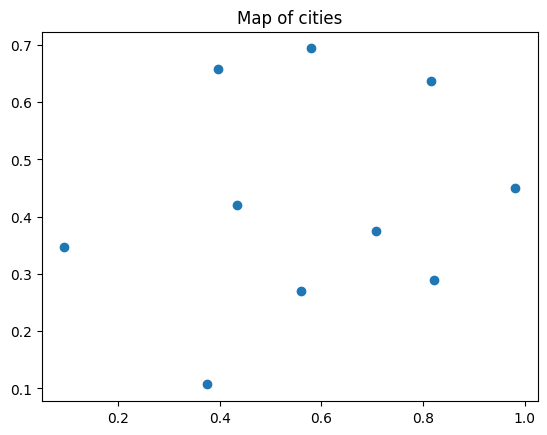

In [ ]:
plt.plot(city_x, city_y, 'o')
plt.title('Map of cities')

In [ ]:
d = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        d[i, j] = np.sqrt((city_x[i] - city_x[j])**2 + (city_y[i] - city_y[j])**2)

print(d);

[[0.         0.34338442 0.42658611 0.28338155 0.27837426 0.2839305
  0.61457338 0.42136588 0.18083431 0.14198059]
 [0.34338442 0.         0.62144641 0.24149977 0.31110936 0.46981725
  0.59772602 0.18765331 0.42344051 0.4704415 ]
 [0.42658611 0.62144641 0.         0.68854876 0.31799978 0.69602745
  0.37002028 0.55185772 0.24643285 0.48161065]
 [0.28338155 0.24149977 0.68854876 0.         0.43961358 0.25089131
  0.77763325 0.41960451 0.44648371 0.34743938]
 [0.27837426 0.31110936 0.31799978 0.43961358 0.         0.54948616
  0.34699896 0.24151826 0.19563141 0.40954276]
 [0.2839305  0.46981725 0.69602745 0.25089131 0.54948616 0.
  0.89381758 0.62178241 0.45812554 0.22633409]
 [0.61457338 0.59772602 0.37002028 0.77763325 0.34699896 0.89381758
  0.         0.43430689 0.4721393  0.72975858]
 [0.42136588 0.18765331 0.55185772 0.41960451 0.24151826 0.62178241
  0.43430689 0.         0.42080041 0.56286588]
 [0.18083431 0.42344051 0.24643285 0.44648371 0.19563141 0.45812554
  0.4721393  0.420800

In [ ]:
A = 500
B = 500
C = 1000
D = 500
alpha = 0.0001


def hopfield():
    u0 = 0.02
    toend = 0
    udao = np.zeros((N, N))
    ctr = 0
    while toend == 0:
        ctr += 1
        v = np.random.rand(N,N)
        u = np.ones([N, N])*(-u0*np.log(N-1)/2)
        u += u*0.91
        for _ in range(1000):
            for vx in range(N):
                for vi in range(N):
                    j1, j2, j3, j4 = 0, 0, 0, 0
                    for j in range(N):
                        if j != vi:
                            j1 += v[vx, j]
                    j1 *= -A

                    for y in range(N):
                        if y != vx:
                            j2 += v[y, vi]
                    j2 *= -B

                    j3 = np.sum(v)
                    j3 = -C*(j3-N)

                    for y in range(N):
                        if y != vx:
                            if vi == 0:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, N-1])
                            elif vi == N-1:
                                j4 += d[vx, y]*(v[y, vi-1]+v[y, 0])
                            else:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, vi-1])
                    j4 *= -D
                    udao[vx, vi] = -u[vx, vi]+j1+j2+j3+j4


            u = u + alpha*udao

            v = (1+np.tanh(u/u0)) / 2

            for vx in range(N):
                for vi in range(N):
                    if(v[vx, vi] < 0.7):
                        v[vx, vi] = 0
                    if(v[vx, vi] >= 0.7):
                        v[vx, vi]=1


        t1, t2, t3 = 0, 0, 0


        t1=0
        for vx in range(N):
            for vi in range(N):
                t1+=v[vx, vi]


        t2=0
        for x in range(N):
            for i in range(N-1):
                for j in range(i+1, N):
                    t2+=np.multiply(v[x, i], v[x, j])


        t3=0
        for i in range(N):
            for x in range(N-1):
                for y in range(x+1, N):
                    t3+=np.multiply(v[x, i], v[y, i])

        # stop the loop after getting the valid solution
        if t1 == N and t2 == 0 and t3 == 0:
            toend = 1
        else:
            toend = 0
    # returns the resulting matrix v and the number of iterations ctr that were required to obtain a valid solution.
    return(v, ctr)

In [ ]:
def total_distance(v):
    city_x_final = np.zeros((N+1))
    city_y_final = np.zeros((N+1))

    for j in range(N):
        for i in range(N):
            if v[i,j] == 1:
                city_x_final[j] = city_x[i]
                city_y_final[j] = city_y[i]

    city_x_final[N] = city_x_final[0]
    city_y_final[N] = city_y_final[0]

    # calculate the total distance
    td = 0
    for i in range(N-1):
        td += np.sqrt((city_x_final[i] - city_x_final[i+1])**2
                    + (city_y_final[i] - city_y_final[i+1])**2)
    td += np.sqrt((city_x_final[N-1] - city_x_final[0])**2
                + (city_y_final[N-1] - city_y_final[0])**2)

    return(td, city_x_final, city_y_final)

In [ ]:
#It initializes a v matrix with zeros
import numpy as np
v = np.zeros([N,N])

ct = 0

min_dist = 20
best_path = None

# runs the hopfield() function 20 times and
# at each iteration, checks if the resulting path has a lower total distance than the current minimum distance.
# If the total distance is less than the previous minimum distance,
# it updates the minimum distance and stores the binary matrix as the best path

for i in range(20):
    v, steps = hopfield()
    print(v)
    td, _, _ = total_distance(v)
    print(f"Epoch {i}: Ran for {steps} steps, total distance {td}")
    if td < min_dist:
        min_dist = td
        best_path = v
print(min_dist)
print(best_path)
# At the end of the loop, it prints the final minimum distance and the best path found.


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Epoch 0: Ran for 3 steps, total distance 2.785649715619179
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Epoch 1: Ran for 1 steps, total distance 3.075213030938107
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.

In [ ]:
# takes in a Hopfield network state v and returns a string representation of the optimal route for the Traveling Salesman Problem (TSP) found by the network.
# The function does this by iterating over each column of the state matrix and appending the index of the row with the highest activation to a string,
# separated by arrows ->. Finally, the first index is appended to the end to create a cycle.
#search for 1 column wise in  the best path matrix
def get_route(v):
    route = ""
    for j in range(v.shape[1]):
        route += str(np.argmax(v[:, j])) + ' -> '
    return (route + str(np.argmax(v[:, 0])))
#For each column, it finds the row with the highest value (which will be 1 in the case of the Hopfield network), using the np.argmax() function.
#after the loop has finished, it appends the index of the first city to the route string to complete the tour.

# For example, if v is a 5x5 matrix representing the optimal state of the Hopfield network for the TSP,
# get_route(v) might return the string "3 -> 1 -> 0 -> 4 -> 2 -> 3", indicating that the optimal route starts at node 3,
# then goes to node 1, node 0, and so on, before returning to node 3 to complete the cycle.
print(get_route(best_path))

9 -> 5 -> 3 -> 1 -> 7 -> 4 -> 6 -> 2 -> 8 -> 0 -> 9


In [ ]:
def get_route_indices(v):
    indices = []
    for j in range(v.shape[1]):
        indices.append(np.argmax(v[:, j]))
    indices.append(np.argmax(v[:, 0]))
    return indices

indices = get_route_indices(best_path)
print(indices)

[9, 5, 3, 1, 7, 4, 6, 2, 8, 0, 9]


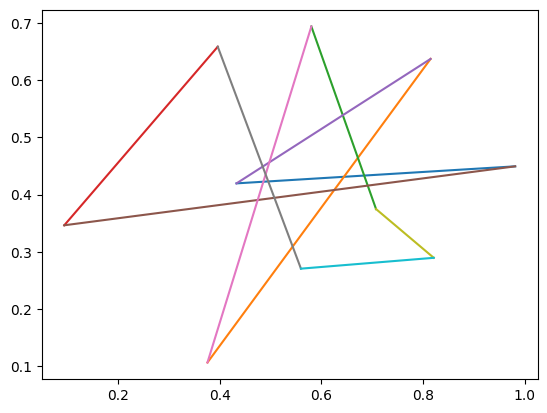

In [ ]:
# indices = get_route_indices(best_path)
for i in indices[1:]:
    plt.plot([city_x[i], city_x[i-1]], [city_y[i], city_y[i-1]], '-')
plt.show()

In [ ]:
num_cities = 10
weights_needed = num_cities ** 2
print(f"Weights needed for a 10-city TSP using a Hopfield network: {weights_needed}")

Weights needed for a 10-city TSP using a Hopfield network: 100
